### Standford Cars Vehicle Recognition - Exploratory Data Analysis

### CODE ONLY, For a detailed report, please refer to the Final Report

#### by Sean Sungil Kim

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# custom python scripts
import SC_sungil             # preprocessing
#import Models_sungil         # exploratory analysis and model fitting/comparisons

In [3]:
# loading the images, classes and labels
#train_sc_data, train_bounding_boxes, train_data_class, data_labels = \
#    SC_sungil.load_images('cars_train/cars_train/cars_train/', 'devkit/cars_train_annos.mat',\
#                          None, 'devkit/cars_meta.mat')
#test_sc_data, test_bounding_boxes, test_data_class = \
#    SC_sungil.load_images('cars_test/', None, 'devkit/cars_test_annos_withlabels', None)

# cropping the original images to detect vehicles
#train_detected_sc = SC_sungil.vehicle_detect(train_sc_data, train_bounding_boxes)
#test_detected_sc = SC_sungil.vehicle_detect(test_sc_data, test_bounding_boxes)

# saving the vehicle detected images
#SC_sungil.save_as_jpg(train_detected_sc, test_detected_sc)

In [4]:
# for convenience, vehicle detected images are already saved
# loading the pre-saved vehicle detected images, classes and labels
train_detected_sc, train_data_class, data_labels = SC_sungil.load_images('saved_images/training/',\
                                            'devkit/cars_train_annos.mat', None, 'devkit/cars_meta.mat')
test_detected_sc, test_data_class = SC_sungil.load_images('saved_images/testing/', None,\
                                                          'devkit/cars_test_annos_withlabels', None)

Training image loading runtime: 271.688357591629
Testing image loading runtime: 230.6850929260254


In [5]:
# number of classes
num_classes = max(train_data_class)

# obtaining lists of make, model, type, and year extracted from the data_labels
make_List, model_List, type_List, year_List = SC_sungil.split_labels(data_labels)

# returning/saving the class and labels in csv format for my group members
# both for the training and testing set
train_df = SC_sungil.csv_convrt(train_data_class, make_List, model_List, \
                                type_List, year_List, 'train_class_data.csv')
test_df = SC_sungil.csv_convrt(test_data_class, make_List, model_List, \
                               type_List, year_List, 'test_class_data.csv')

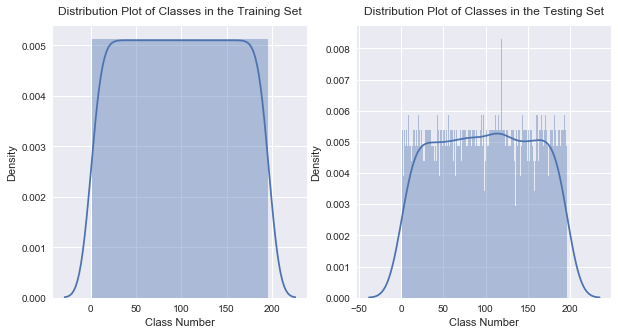

Total of 8232 images in the training data
Total of 2058 images in the testing data
80.00 percent training set, 20.00 percent testing set


In [6]:
# combining the training and testing dataset
all_data = np.concatenate((train_detected_sc, test_detected_sc), axis = 0)
all_class = np.concatenate((train_data_class, test_data_class), axis = 0)

# 80% train 20% test split
# test_size was set to 0.1271, to maintain the validation set size to 20% post under-sampling
x_train, x_test, y_train, y_test = train_test_split(all_data, all_class, stratify = all_class,\
                                                    test_size = 0.1271)

# random under-sampling
und_x_train, und_y_train = SC_sungil.under_sample(x_train, y_train)

# post split class distribution
fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.distplot(und_y_train, bins = num_classes)
plt.title('Distribution Plot of Classes in the Training Set', y = 1.02)
plt.xlabel('Class Number')
plt.ylabel('Density')
plt.subplot(1, 2, 2)
sns.distplot(y_test, bins = num_classes)
plt.title('Distribution Plot of Classes in the Testing Set', y = 1.02)
plt.xlabel('Class Number')
plt.ylabel('Density')
plt.show()

tot_len = len(und_x_train) + len(x_test)
print('Total of %i images in the training data' % len(und_x_train))
print('Total of %i images in the testing data' % len(x_test))
print('%0.2f percent training set, %0.2f percent testing set' \
      % (len(und_x_train)/tot_len*100, len(x_test)/tot_len*100))

In [7]:
# obtaining the average image size, list of width sizes and list of height sizes
train_avg_size, train_x_size_List, train_y_size_List = SC_sungil.avg_size(und_x_train)
test_avg_size, test_x_size_List, test_y_size_List = SC_sungil.avg_size(x_test)
print('The average image size in the Stanford Cars Training Set is', train_avg_size)
print('The average image size in the Stanford Cars Testing Set is', test_avg_size)

The average image size in the Stanford Cars Training Set is (574, 308)
The average image size in the Stanford Cars Testing Set is (564, 306)


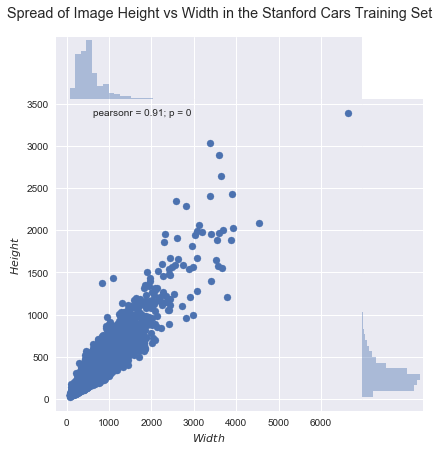

In [8]:
# converting into pandas series
train_width = pd.Series(np.array(train_x_size_List), name = "$Width$")
train_height = pd.Series(np.array(train_y_size_List), name = "$Height$")

# jointplot, combining a scatterplot of width vs. height 
# and distribution plots of width and height
g = sns.jointplot(train_width, train_height, kind = "scatter", space = 0)
g.fig.suptitle('Spread of Image Height vs Width in the Stanford Cars Training Set', y = 1.04)
plt.show()

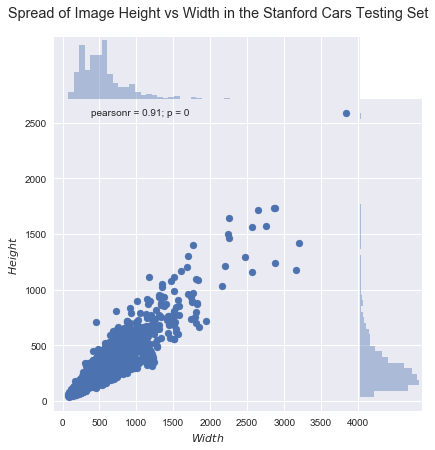

In [9]:
# converting into pandas series
test_width = pd.Series(np.array(test_x_size_List), name = "$Width$")
test_height = pd.Series(np.array(test_y_size_List), name = "$Height$")

# jointplot, combining a scatterplot of width vs. height 
# and distribution plots of width and height
g = sns.jointplot(test_width, test_height, kind = "scatter", space = 0)
g.fig.suptitle('Spread of Image Height vs Width in the Stanford Cars Testing Set', y = 1.04)
plt.show()

For the side-to-side graphs below, the sorted (Make, Model, Type, Year, and Type grouped by Year) order of the training set plot was applied on the order of the testing set plot.

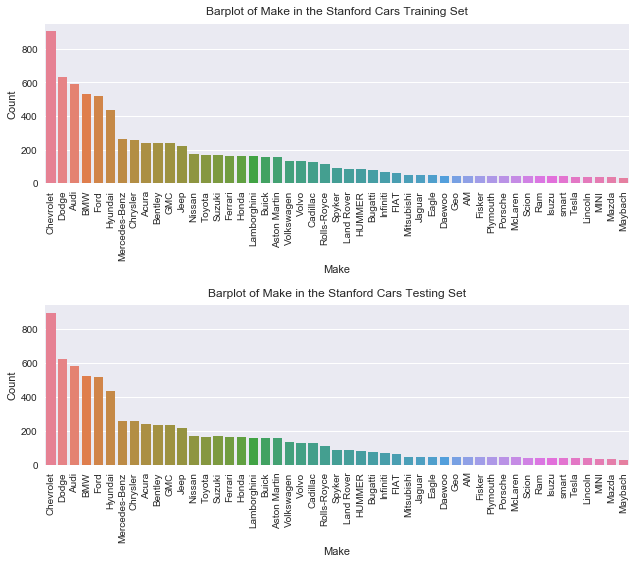

In [10]:
# Countplot of Make in the Stanford Cars Training and Testing Set
fig = plt.figure(figsize = (9, 8))
plt.subplot(2, 1, 1)
sns.countplot('Make', data = train_df, order = train_df['Make'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Make in the Stanford Cars Training Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)
plt.subplot(2, 1, 2)
sns.countplot('Make', data = test_df, order = train_df['Make'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Make in the Stanford Cars Testing Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

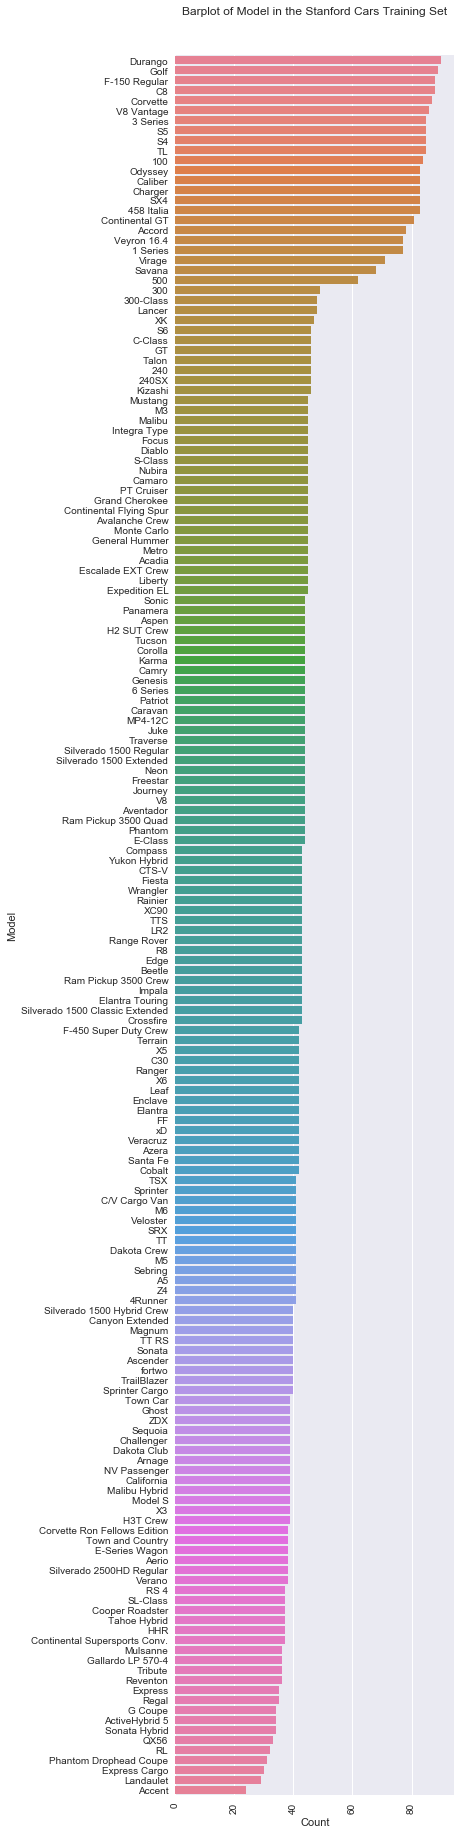

In [11]:
# Countplot of Model in the Stanford Cars Training Set
plt.figure(figsize = (5, 32))
sns.countplot(y = 'Model', data = train_df, order = train_df['Model'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Model in the Stanford Cars Training Set', y = 1.02)
plt.xlabel('Count'), plt.xticks(rotation = 90)
plt.show()

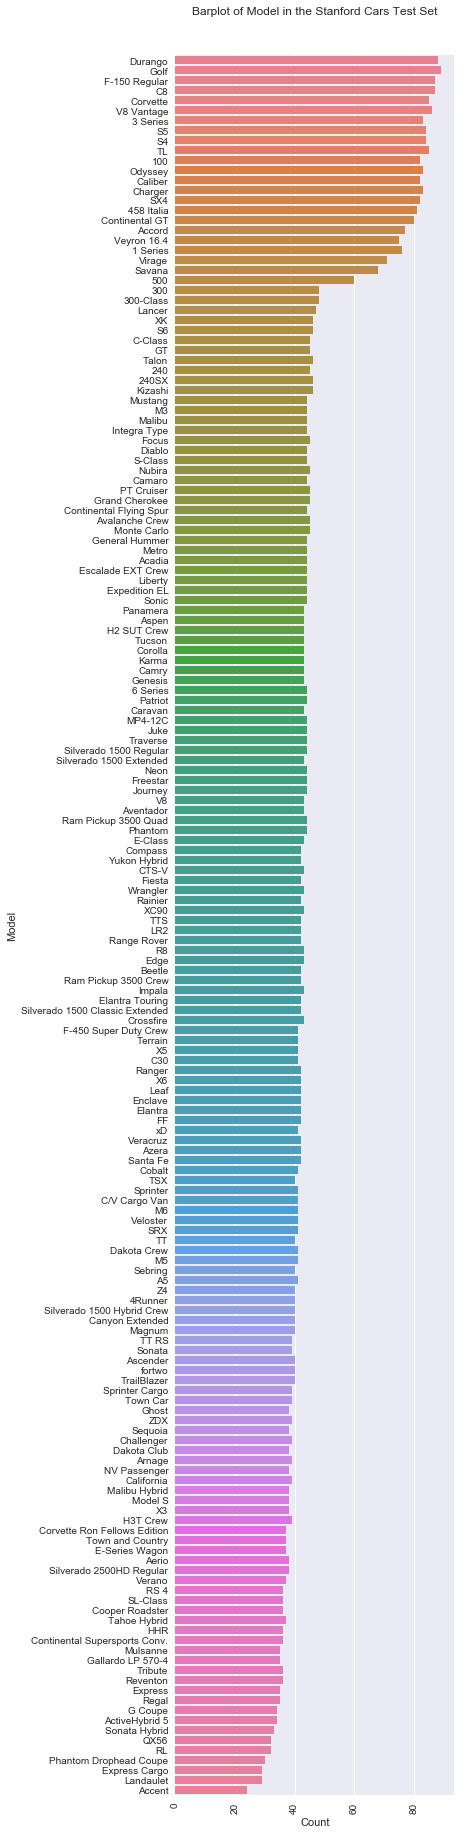

In [12]:
# Countplot of Model in the Stanford Cars Testing Set
plt.figure(figsize = (5, 32))
sns.countplot(y = 'Model', data = test_df, order = train_df['Model'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Model in the Stanford Cars Test Set', y = 1.02)
plt.xlabel('Count'), plt.xticks(rotation = 90)
plt.show()

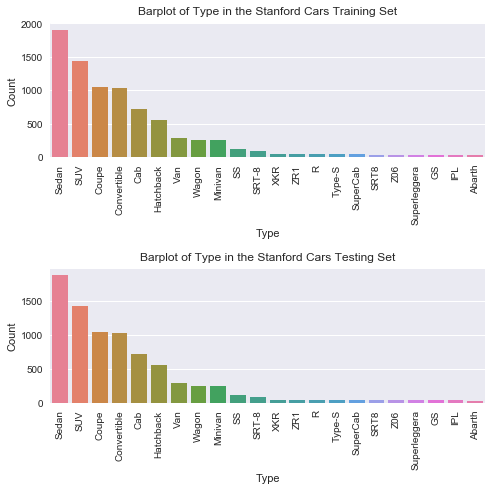

In [13]:
# Countplot of Type in the Stanford Cars Training and Testing Set
plt.figure(figsize = (7, 7))
plt.subplot(2, 1, 1)
sns.countplot('Type', data = train_df, order = train_df['Type'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Type in the Stanford Cars Training Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)
plt.subplot(2, 1, 2)
sns.countplot('Type', data = test_df, order = train_df['Type'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Type in the Stanford Cars Testing Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

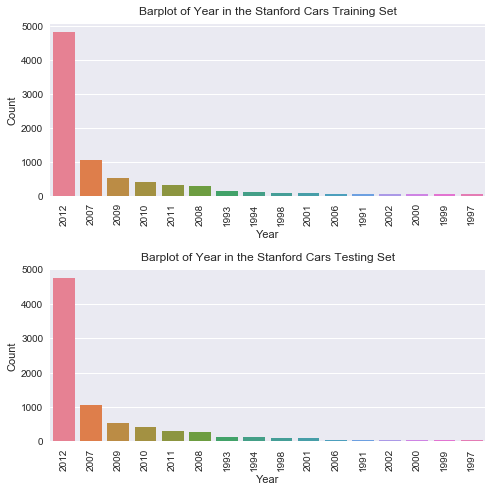

In [14]:
# Countplot of Year in the Stanford Cars Training and Testing Set
plt.figure(figsize = (7, 7))
plt.subplot(2, 1, 1)
sns.countplot('Year', data = train_df, order = train_df['Year'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Year in the Stanford Cars Training Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)
plt.subplot(2, 1, 2)
sns.countplot('Year', data = test_df, order = train_df['Year'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Year in the Stanford Cars Testing Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

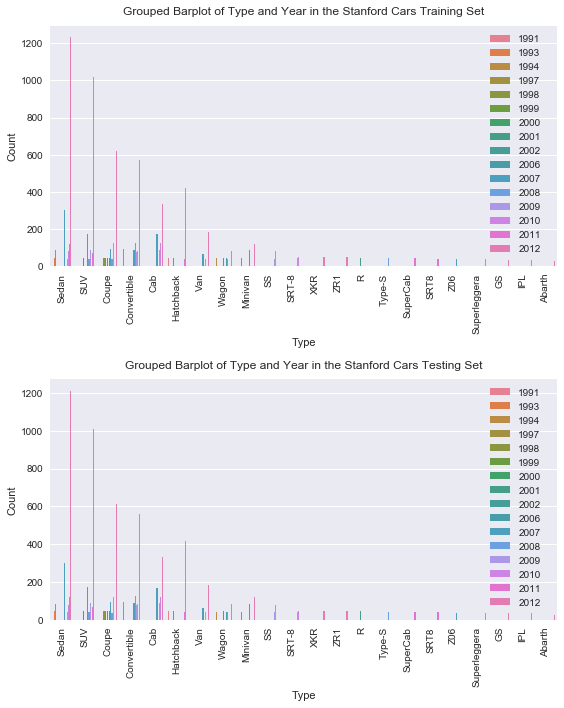

In [15]:
# Countplot of Type grouped by Year in the Stanford Cars Training and Testing Set
plt.figure(figsize = (8, 10))
plt.subplot(2, 1, 1)
sns.countplot('Type', hue = 'Year', order = train_df['Type'].value_counts().index,\
              data = train_df, palette = "husl")
plt.title('Grouped Barplot of Type and Year in the Stanford Cars Training Set', y = 1.02),
plt.legend(bbox_to_anchor = (0.85, 1), loc = 2)
plt.ylabel('Count'), plt.xticks(rotation = 90)
plt.subplot(2, 1, 2)
sns.countplot('Type', hue = 'Year', order = train_df['Type'].value_counts().index,\
              data = test_df, palette = "husl")
plt.title('Grouped Barplot of Type and Year in the Stanford Cars Testing Set', y = 1.02),
plt.legend(bbox_to_anchor = (0.85, 1), loc = 2)
plt.ylabel('Count'), plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [16]:
# edge detection and histogram of gradients
edge_img = SC_sungil.canny_edge_convrt(und_x_train[0])
hog_img = SC_sungil.hog_compute(und_x_train[0])

HOG feature computation runtime: 5.3614397048950195


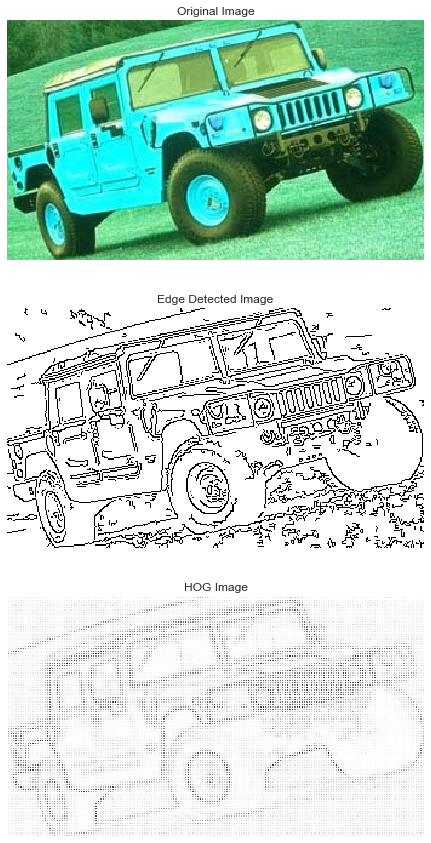

In [19]:
# comparison of original vehicle detected vs. edge detected vs. hog
plt.figure(figsize = (12, 15))
plt.subplot(3, 1, 1), plt.xticks([]), plt.yticks([]), plt.grid(False)
plt.imshow(und_x_train[0], c), plt.title('Original Image')
plt.subplot(3, 1, 2), plt.xticks([]), plt.yticks([]), plt.grid(False)
plt.imshow(edge_img, cmap = plt.cm.binary), plt.title('Edge Detected Image')
plt.subplot(3, 1, 3), plt.xticks([]), plt.yticks([]), plt.grid(False)
plt.imshow(hog_img, cmap = plt.cm.binary), plt.title('HOG Image')
plt.show()

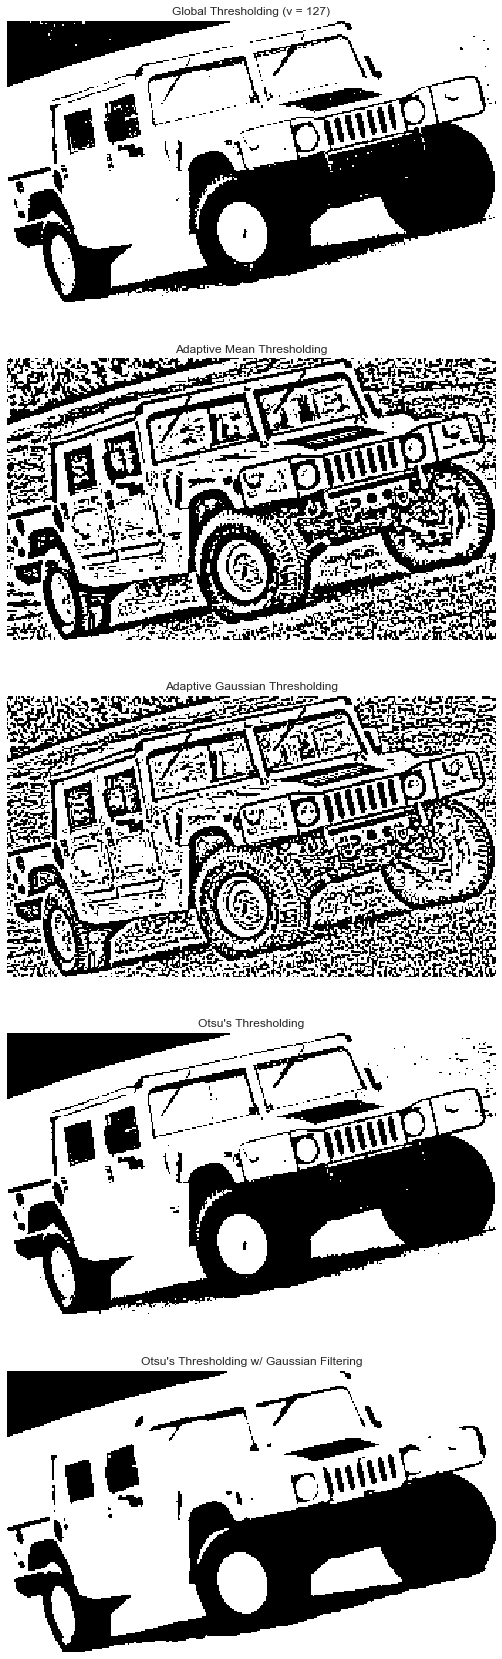

In [18]:
# comparison of 5 different thresholding methods
SC_sungil.compare_thresh(und_x_train[0])